In [3]:
from utils_nfchoa import *

Position: [4.5 1.5]. Frequency: 343. N Points: 400


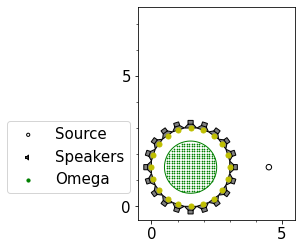

In [6]:
radius = 1.5
n_loud = 20
frq = 343
pos = np.asarray([3 * radius, radius])
r = 2 / 3
n_points = max(np.pi * (radius * r) ** 2 * 2 * (2 * frq / 343) ** 2 * 1.5, 400)
region_interest = CircleRegion(n_points, 2 * radius, ratio=r)
green_function = HRTF(frq, reference=pos)
lim = np.asarray([radius, 2 * radius])
normalization = np.linalg.norm(pos - lim) if pos[1] > 2 * radius + 1 else 1
intensity = normalization * pressure(60)
source = Source(frq, pos, intensity, region_interest, green_function=green_function)
loudspeakers = CircleLoudspeakers(n_loud, 2 * radius, frq, green_function=green_function) # Ojo, diametro = 3 radios

# SWEET
print(f'Position: {pos}. Frequency: {frq}. N Points: {n_points}')
opt = SweetOptimization(loudspeakers, source, region_interest, truncation=0, penalty_norm=1, lamb=10 ** (-10))
opt.plot_instance()

In [9]:
def inverse_sampling_radius(x, low, high):
    return np.sqrt(x * (high ** 2 - low ** 2) + low ** 2)


def polar_to_cartesian(r, theta):
    return (r * np.vstack([np.cos(theta), np.sin(theta)])).T


def construct_sample(freq_interval, angl_interval, dist_interval, n_samples):
    freq = np.random.uniform(low=freq_interval[0], high=freq_interval[1], size=n_samples)
    angl = np.random.uniform(low=angl_interval[0], high=angl_interval[1], size=n_samples)
    dist = inverse_sampling_radius(np.random.uniform(size=n_samples), low=dist_interval[0], high=dist_interval[1])
    return np.c_[freq, dist, angl]


def construct_sample_cartesian(freq_interval, angl_interval, dist_interval, n_samples):
    freq = np.random.uniform(low=freq_interval[0], high=freq_interval[1], size=n_samples)
    angl = np.random.uniform(low=angl_interval[0], high=angl_interval[1], size=n_samples)
    dist = inverse_sampling_radius(np.random.uniform(size=n_samples), low=dist_interval[0], high=dist_interval[1])
    return np.c_[freq, polar_to_cartesian(dist, angl)]

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

freq_interval = [50, 500]
angl_interval = [0, 3 / 4 * 2 * np.pi]
dist_interval = [2, 3]
n_samples = 100000
samples = construct_sample_cartesian(freq_interval, angl_interval, dist_interval, n_samples)

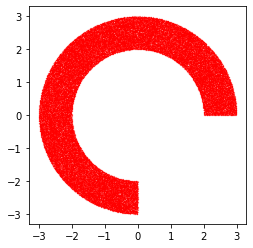

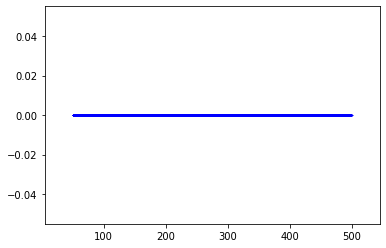

In [11]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.scatter(samples[:, 1], samples[:, 2], c='red', s=0.01)
plt.xlim(-dist_interval[1] * 1.1, dist_interval[1] * 1.1)
plt.ylim(-dist_interval[1] * 1.1, dist_interval[1] * 1.1)
plt.show()

dif = freq_interval[1] - freq_interval[0]
plt.scatter(samples[:, 0], np.zeros(n_samples), c='blue', s=0.01)
plt.xlim(freq_interval[0] - 0.1 * dif, freq_interval[1] + 0.1 * dif)
plt.show()

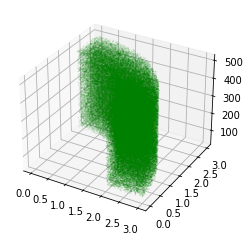

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(samples[:, 1], samples[:, 2], samples[:, 0], c='green', s=0.01)
plt.show()

In [ ]:
# NFC-HOA Samples

# No sfs normalization
for sample in samples:
    freq = samples[0]
    dist = samples[1]
    angl = samples[2]

    a_l = np.linspace(0, 2 * np.pi, num=n_loud, endpoint=False)
    r_l = radius
    a_s = angl
    r_s = dist
    f = freq
    d = nfchoa_25d(a_s, r_s, a_l, r_l, f)